In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm

import tarea

En esta tarea, si usas python, use matplotlib o seaborn para los gráficos en lugar de holoviews.

Considere el siguiente dataset con características de automóviles:

In [2]:
df = tarea.read_mpg_data()
df.head()

MPG  cylinders  displacement  horsepower  weight  \
car_name                                                                       
chevrolet chevelle malibu  18.0          8         307.0       130.0  3504.0   
buick skylark 320          15.0          8         350.0       165.0  3693.0   
plymouth satellite         18.0          8         318.0       150.0  3436.0   
amc rebel sst              16.0          8         304.0       150.0  3433.0   
ford torino                17.0          8         302.0       140.0  3449.0   

                           acceleration  model year  origin  
car_name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1

El consumo se mide en millas por galón (MPG). Esta variable es la variable dependiente (respuesta).

Consejos para un DataFrame llamado `df`: 

- Puede recuperar una columna indexando con su nombre, por ejemplo `df["MPG"]`
- Puede recuperar un conjunto de columnas indexando con una lista de nombres, por ejemplo `df[["cylinders", "weight"]]`
- Puede calcular el coeficiente de correlación entre las variables con el método: `df.corr()`

# Parte I: Aborda un caso en el que se violan los supuestos de residuos (30%)

Considere un modelo de regresión lineal que prediga MPG en función de los caballos de fuerza (horsepower).

Sigue el pipeline (con variación si es necesario). Busca un modelo que cumplir con los supuestos de residuos completamente o cumplir con los supuestos de residuos mejor que el baseline predeciendo MPG con horsepower sin transformaciones de MPG y horsepower. 

Muestra tu proceso, comenta sobre lo que observa en el proceso, describe tu resumen y conclusión, y explica bien cómo llegar a tu conclusión. 

Pista: Puedes hacer transformaciones de MPG o horsepower.

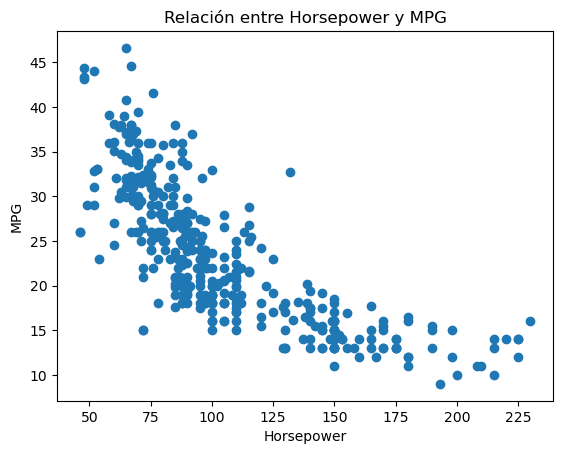

In [3]:
# Visualizar la relación entre MPG y horsepower
plt.scatter(df["horsepower"], df["MPG"])
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Relación entre Horsepower y MPG")
plt.show()

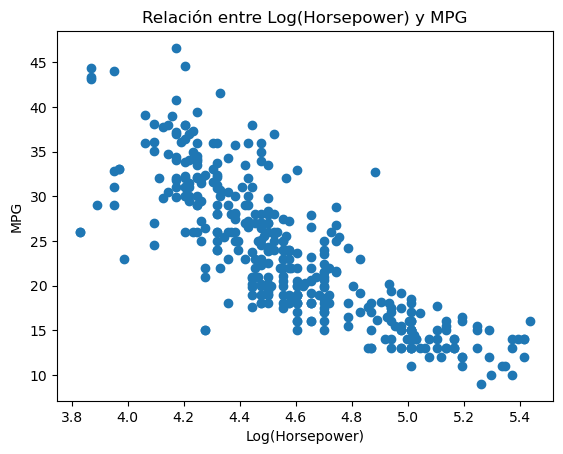

In [4]:
df["log_horsepower"] = np.log(df["horsepower"])

plt.scatter(df["log_horsepower"], df["MPG"])
plt.xlabel("Log(Horsepower)")
plt.ylabel("MPG")
plt.title("Relación entre Log(Horsepower) y MPG")
plt.show()

In [5]:
X = sm.add_constant(df["log_horsepower"])
y = df["MPG"]

model = sm.OLS(y, X).fit()

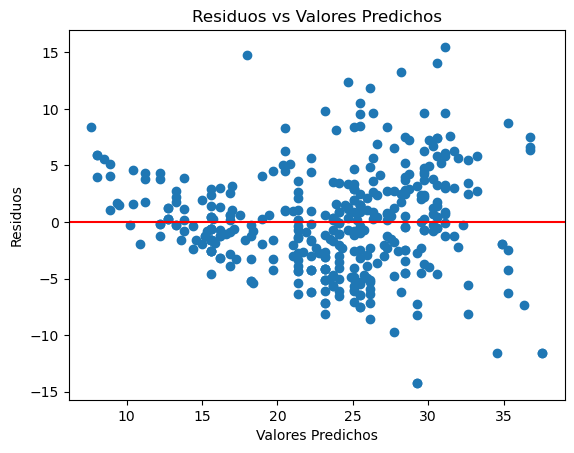

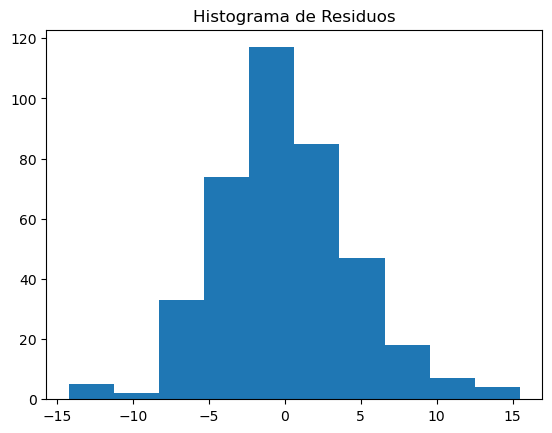

In [6]:
# Comprobar la homocedasticidad y la normalidad de los residuos
plt.scatter(model.predict(), model.resid)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores Predichos")
plt.show()

# Histograma de los residuos para comprobar la normalidad
plt.hist(model.resid)
plt.title("Histograma de Residuos")
plt.show()


# Parte II: Desarrolla tus propias preguntas de investigación y respóndelas con el análisis de regresión lineal (70%)

 Desarrolla tus propias preguntas (1-2) de investigación en contexto de este dataset y respóndelas con el análisis de regresión lineal. Tiene que consider el valor y la significancia de los coeficientes de los predictores. 

Sigue el pipeline (con variación si es necesario). Muestra tu proceso, comenta sobre lo que observa en el proceso, describe tu resumen y conclusión, y explica bien cómo llegar a tu conclusión. 


### Pregunta de investigación 1: 

#### ¿Cuál es el impacto del peso del automóvil (weight) y el año del modelo (model year) en el consumo de combustible (MPG)?

#### Hipótesis:

* A medida que el peso del automóvil aumenta, el MPG disminuirá (es decir, consumirá más combustible).

* Los automóviles más nuevos (años de modelo más recientes) tendrán un MPG más alto debido a las mejoras en la eficiencia del motor y la tecnología.

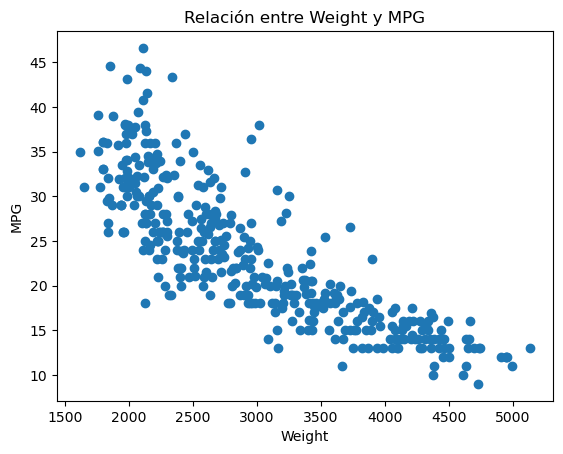

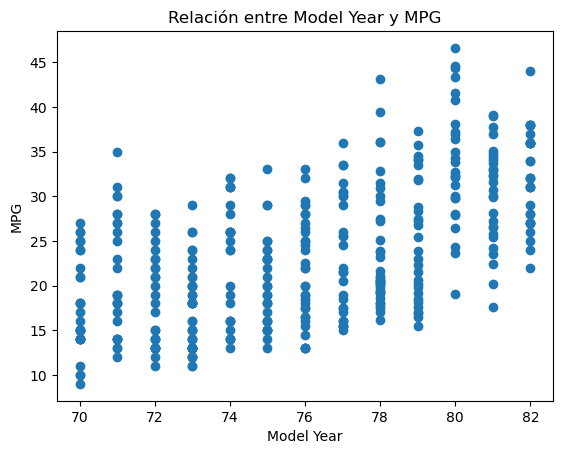

In [7]:
# Relación entre MPG y weight
plt.scatter(df["weight"], df["MPG"])
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("Relación entre Weight y MPG")
plt.show()

# Relación entre MPG y model year
plt.scatter(df["model year"], df["MPG"])
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.title("Relación entre Model Year y MPG")
plt.show()


In [8]:
X = df[["weight", "model year"]]
X = sm.add_constant(X)  # Añadir una constante (intercepto) al modelo
y = df["MPG"]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Fri, 27 Oct 2023   Prob (F-statistic):          3.33e-140
Time:                        20:39:51   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3473      4.007     -3.581      0.0

##### Interpretación de los resultados de la regresión OLS:

1. R-squared y Adj. R-squared: Estos valores indican la proporción de la variabilidad en la variable dependiente (MPG) que es explicada por las variables independientes en el modelo. Un valor de R-squared de 0.808 significa que aproximadamente el 80.8% de la variación en MPG es explicada por el peso (weight) y el año del modelo (model year). Es un valor relativamente alto, lo que sugiere que el modelo se ajusta bien a los datos.

2. Coeficientes:

* const (Intercepción): El valor de -14.3473 indica el valor esperado de MPG cuando todas las otras variables son 0. En este contexto, no tiene una interpretación práctica directa, pero es necesario para la ecuación de regresión.

* weight: Por cada aumento de una unidad en el peso del automóvil, esperamos que el MPG disminuya en 0.0066 unidades, manteniendo constantes todas las demás variables. Este resultado confirma nuestra hipótesis inicial de que a medida que aumenta el peso del automóvil, el MPG disminuirá.

* model year: Por cada año adicional en el año del modelo, esperamos que el MPG aumente en 0.7573 unidades, manteniendo constantes todas las demás variables. Esto indica que los automóviles más recientes tienden a ser más eficientes en términos de consumo de combustible.

3. Valores p:

Todos los valores p asociados con los coeficientes son muy cercanos a 0, lo que indica que las variables son estadísticamente significativas en la predicción de MPG.

4. Omnibus y Prob(Omnibus): Estas son pruebas de normalidad de los residuos. Un valor Prob(Omnibus) cercano a 0 indica que los residuos no siguen una distribución normal, lo que podría ser motivo de preocupación.

5. Durbin-Watson: Mide la autocorrelación de los residuos. Un valor cercano a 2 sugiere que no hay autocorrelación, lo cual es bueno. El valor de 1.230 está algo alejado de 2, lo que podría sugerir una cierta autocorrelación.

6. Jarque-Bera (JB) y Prob(JB): Otra prueba de normalidad de los residuos. Al igual que Omnibus, un Prob(JB) cercano a 0 sugiere que los residuos no son normales.

7. Cond. No.: Indica problemas de multicolinealidad. Un número condicional grande, como 7.17e+04, sugiere que podría haber problemas de multicolinealidad en el modelo. Esto significa que las variables independientes podrían estar correlacionadas entre sí.
##### Resumen y Conclusión:

El modelo parece ser adecuado con un alto valor de R-squared. Las variables weight y model year son predictores significativos de MPG, como se esperaba. Sin embargo, hay indicaciones de que los residuos no son normales y podría haber problemas de multicolinealidad. Es posible que se necesite más trabajo para abordar estos problemas, como transformaciones adicionales o la inclusión/eliminación de otras variables predictoras.


### Pregunta de investigación 2: ¿Existe una relación significativa entre el número de cilindros (cylinders) de un automóvil y su aceleración (acceleration)?

#### Hipótesis:

* Los automóviles con más cilindros, siendo potencialmente más potentes, podrían tener una aceleración mayor (menos tiempo para acelerar) que los automóviles con menos cilindros.

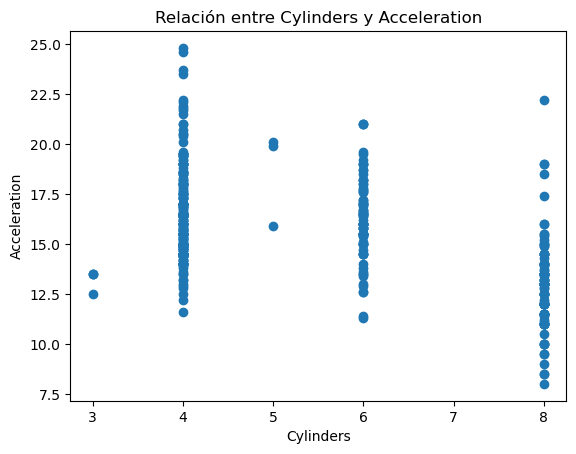

In [9]:
plt.scatter(df["cylinders"], df["acceleration"])
plt.xlabel("Cylinders")
plt.ylabel("Acceleration")
plt.title("Relación entre Cylinders y Acceleration")
plt.show()

In [10]:
X = sm.add_constant(df["cylinders"])  
y = df["acceleration"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           acceleration   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     133.3
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.01e-26
Time:                        20:44:11   Log-Likelihood:                -895.91
No. Observations:                 392   AIC:                             1796.
Df Residuals:                     390   BIC:                             1804.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0078      0.405     49.378      0.0

1. R-squared y Adj. R-squared: Un valor de R-squared de 0.255 indica que el modelo explica aproximadamente el 25.5% de la variabilidad en la aceleración usando solo el número de cilindros como predictor. Aunque este valor es significativo, es menos del 50%, lo que sugiere que hay otras variables que podrían explicar mejor la variabilidad en la aceleración.

2. Coeficientes:

* const (Intercepción): El valor de 20.0078 indica la aceleración esperada cuando el número de cilindros es 0. Dado que un automóvil no puede tener 0 cilindros, este valor no tiene una interpretación práctica directa pero es necesario para la ecuación de regresión.
* cylinders: El coeficiente es -0.8163. Esto significa que por cada cilindro adicional en un automóvil, esperamos que la aceleración disminuya en 0.8163 unidades. Esta relación es coherente con la hipótesis de que los automóviles con más cilindros, siendo potencialmente más potentes, podrían tener una menor aceleración (es decir, más tiempo para acelerar).
3. Valores p: El valor p asociado con el coeficiente de cylinders es extremadamente bajo (cercano a 0), lo que indica que el número de cilindros es un predictor estadísticamente significativo de la aceleración.

4. Omnibus y Prob(Omnibus): Estas son pruebas de normalidad de los residuos. Un valor Prob(Omnibus) cercano a 0 sugiere que los residuos no siguen una distribución normal.

5. Durbin-Watson: Un valor de 1.395 está cerca de 2, lo que sugiere que hay una autocorrelación mínima en los residuos.

6. Jarque-Bera (JB) y Prob(JB): Indican, al igual que Omnibus, que los residuos no siguen una distribución normal.

7. Cond. No.: Un valor de 19.8 sugiere que no hay problemas graves de multicolinealidad en el modelo, lo cual es esperado ya que solo estamos considerando una variable independiente.

##### Resumen y Conclusión:

El número de cilindros es un predictor significativo de la aceleración, con una relación negativa entre ambas variables. Esto sugiere que a medida que aumenta el número de cilindros en un automóvil, su aceleración tiende a disminuir. Sin embargo, es importante tener en cuenta que el modelo solo explica el 25.5% de la variabilidad en la aceleración, por lo que hay otros factores en el conjunto de datos que no se han considerado y que podrían ser relevantes para predecir la aceleración.